# Учебный проект 5_Статистический анализ данных

## Содержание

* [Описание проекта](#описание-проекта)
* [Импорт библиотек Python и загрузка данных](#импорт-библиотек-python-и-загрузка-данных)
* [Предобработка данных](#предобработка-данных)
* [Исследовательский анализ данных](#исследовательский-анализ-данных)
* [Объединение данных](#объединение-данных)
* [Вывод](#Вывод)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные о пользователях сервиса аренды самокатов "GoFast" — `архив о поездках пользователей из нескольких городов, а также данные самих пользователей`. 

**Задача**: `Проверить статистические гипотезы`

1. Тратят ли пользователи с подпиской **больше** времени на поездки?
2. Расстояние одной поездки в **3 130 метров** - оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает **3 130 метров**?
3. Влияет ли подписка на выручку - `будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки`;
4. Повлияло ли обновление серверов в комании на количество обращений - `снизилось ли количество запросов в службу техподдержки?`

---

Путь решения: `Проведение исследовательского анализа данных и установка параметров, влияющих на цену объектов`. В дальнейшем это послужит основой для построения автоматизированной системы: она отследит аномалии и мошенническую деятельность. 

---

`Располагаемые данные`

**Данные пользователей - users_go**
* user_id - уникальный идентификатор пользователя;
* name - имя пользователя;
* age - возраст;
* city - город;
* subscription_type - тип подписки (free, ultra);

**Данные о поездках - rides_go**
* user_id - уникальный идентификатор пользователя;
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* date - дата совершения поездки;

**Данные о подписках - subscriptions_go**
* subscription_type - тип подписки;
* minute_price - стоимость одной минуты поездки по данной подписке;
* start_ride_price - стоимость начала поездки;
* subscription_fee - стоимость ежемесячного платежа;

## Импорт библиотек Python и загрузка данных <a class = anchor id = 'Импорт'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
    * для проведения статистического анализа.
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных в соответствие с названиями загружаемых датасетов: **users**, **rides**, **subscriptions**;
3. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * перечень столбцов набора данных;
    * общей информации о наборе данных;
4. Построение гистограмм распределения числовых показателей;
5. Формирование вывода по итогам данного этапа.

In [42]:
# импорт библиотек Python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# для проведения статистического анализа
import scipy.stats as st

In [43]:
# загрузка данных в рабочую среду - инициализация соответствующих переменных
try:
    users = pd.read_csv('C:/Users/k.storozhuk/Desktop/YandexPraktikum_projects/datasets/users_go.csv')
    rides = pd.read_csv('C:/Users/k.storozhuk/Desktop/YandexPraktikum_projects/datasets/rides_go.csv')
    subscriptions = pd.read_csv('C:/Users/k.storozhuk/Desktop/YandexPraktikum_projects/datasets/subscriptions_go.csv')
except:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

Структура набора данных users


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None



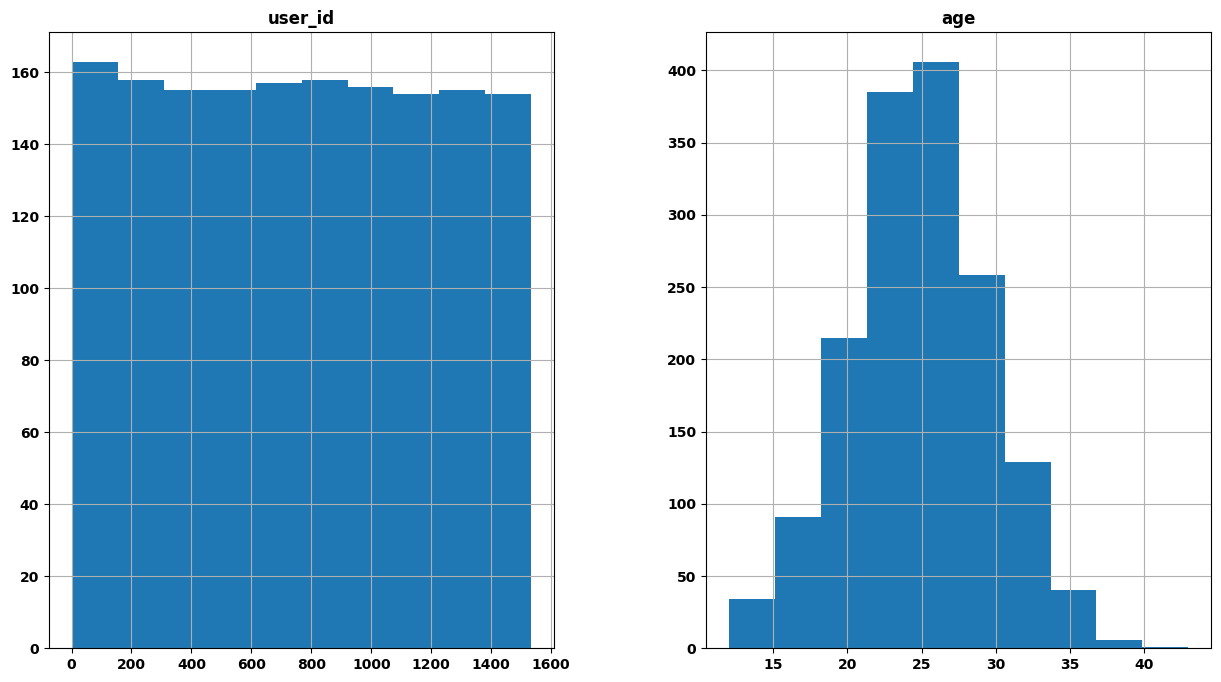

Структура набора данных rides


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None



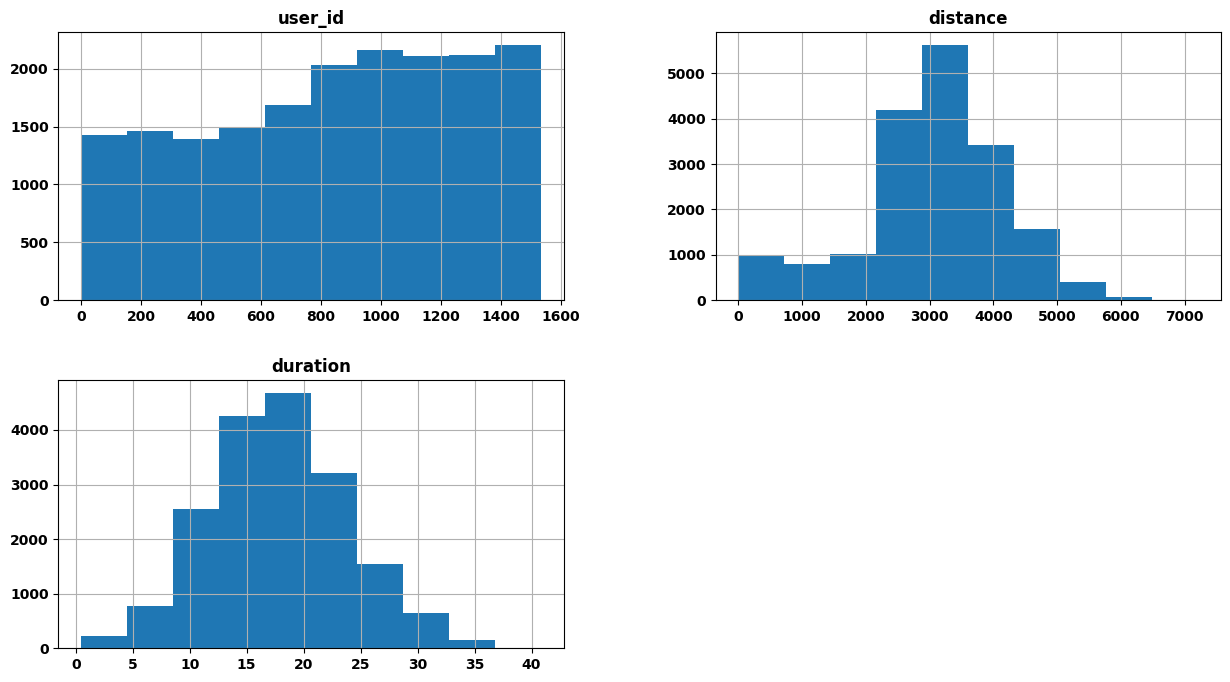

Структура набора данных subscriptions


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes
None



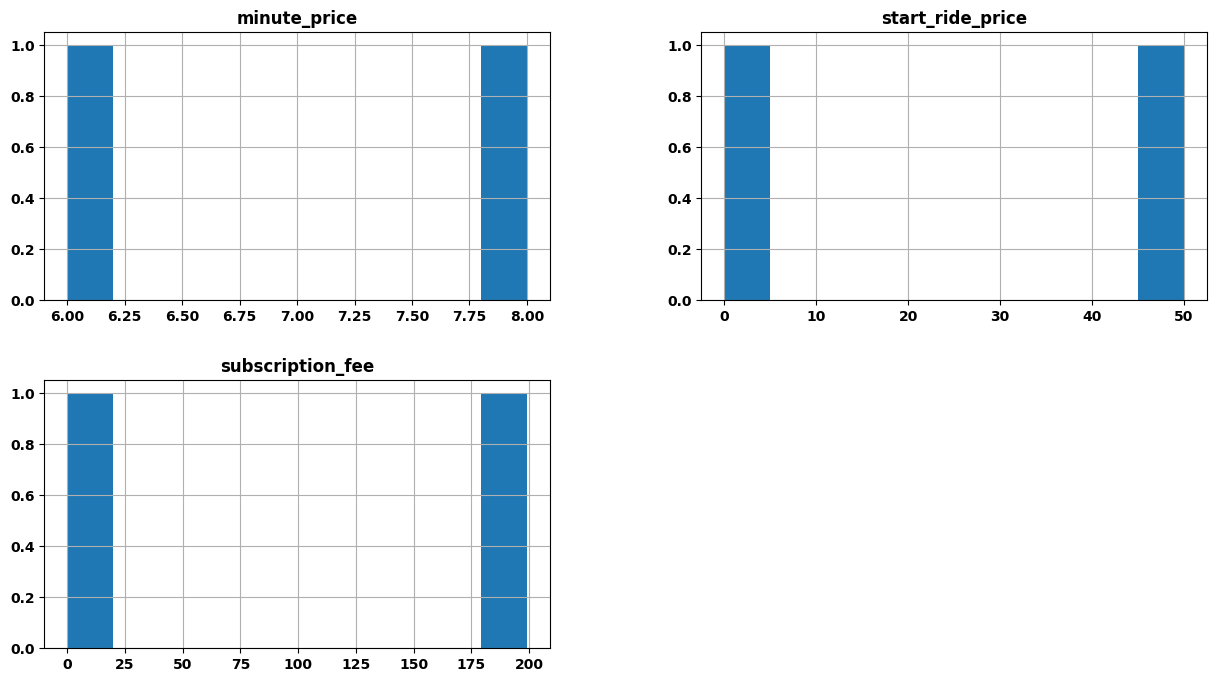

In [44]:
# пользовательская функция для первичного изучения содержимого наборов данных
def  first_meeting (df : pd.DataFrame, df_name : str) -> None:
    print(f'Структура набора данных {df_name}')
    display(df.head())
    print()
    print(df.info())
    print()
    df.hist(figsize=(15, 8))
    plt.show()

# вывод на экран параметров датасетов
first_meeting(users, 'users')
first_meeting(rides, 'rides')
first_meeting(subscriptions, 'subscriptions')

In [45]:
# вывод на экран статистической информации по наборам данных

print('Статистическая информация по набору users')
display(users.describe(include = 'all'))
print()
print('Статистическая информация по набору rides')
display(rides.describe(include = 'all'))

Статистическая информация по набору users


,user_id,name,age,city,subscription_type
count,1565.000000,1565,1565.000000,1565,1565
unique,NaN,194,NaN,8,2
top,NaN,Мария,NaN,Пятигорск,free
freq,NaN,23,NaN,226,846
mean,762.633866,NaN,24.922045,NaN,NaN
std,443.260155,NaN,4.553496,NaN,NaN
min,1.000000,NaN,12.000000,NaN,NaN
25%,378.000000,NaN,22.000000,NaN,NaN
50%,762.000000,NaN,25.000000,NaN,NaN
75%,1146.000000,NaN,28.000000,NaN,NaN



Статистическая информация по набору rides


,user_id,distance,duration,date
count,18068.000000,18068.000000,18068.000000,18068
unique,NaN,NaN,NaN,364
top,NaN,NaN,NaN,2021-12-22
freq,NaN,NaN,NaN,72
mean,842.869936,3070.659976,17.805011,NaN
std,434.734317,1116.831209,6.091051,NaN
min,1.000000,0.855683,0.500000,NaN
25%,487.000000,2543.226360,13.597563,NaN
50%,889.000000,3133.609994,17.678395,NaN
75%,1213.250000,3776.222735,21.724800,NaN


**Вывод**:
1. Импортированы библиотеки Python:
    * для манипулирования данными - **pandas, numpy**;
    * для визуализации данных - **matplotlib, seaborn**;
    * для проведения статистического анализа - **scipy.stats**.
2. Проведена загрузка данных в рабочую среду Jupyter Notebook. Инициализированы переменные: **users**, **rides**, **subscriptions**;
3. Выводены на экран параметры датасетов:
    * общая структура наборов данных - демонстрация первых 5 строк;
    * перечень столбцов наборов данных;
    * общая информация о наборах данных;
4. Построены гистограммы распределения колличественных показателей;

**Вывод после первичного знакомства с данными**:

`users`
* **В таблице нет пропущенных значений** - вся информация о пользователях и их характеристиках доступна;
* **Средний возраст пользователей - 25 лет**. В столбце данной характеристики не содержится **явных** выбросов - медианное и среднее значения почти идентичны;
* В таблице представлены пользователи **из 8 разных городов**;
* Не требуется явного приведения типов - **все значения соответствуют своим категориям**;
* Названия столбцов полностью удовлетворяют формату **snake_case**.

`rides`
* **В таблице нет пропущенных значений** - вся информация о поездках и их характеристиках доступна;
* **Среднее время поездки - 17.8 минут, Медианное время - 17.6 минут**. Характеристика **duration** не содержит **явных** выбросов;
* **Среднее расстояние - 3 070 метров, Медианное расстояние 3 133**. Характеристика **distance** не содержит **явных** выбросов;
* Необходимо явного преобразовать столбец **date** - привести к типу datetime;
* Названия столбцов полностью удовлетворяют формату **snake_case**.

`subscriptions`
* Таблица состоит из 2 строк - типов подписки;
* **В таблице нет пропущенных значений** - вся информация о пользователях и их характеристиках доступна;
* Не требуется явного приведения типов - **все значения соответствуют своим категориям**;
* Названия столбцов полностью удовлетворяют формату **snake_case**.



## Предобработка данных <a class = 'anchor' id = 'Предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Преобразование типов данных в столбце **date** таблицы `rides`;
2. Проверка датасетов на дубликаты и очистка данных:
    * Явные дубликаты;
    * Неявные дубликаты;
3. Инициализация новых столбцов в наборе данных:
    * **month** - в датасете `rides`.

In [46]:
# преобразование столбца  date таблицы rides
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')

# инициализация нового столбца на основании столбца 'date'
rides['month'] = rides['date'].dt.month

# проверка преобразований
print(rides.dtypes)
rides.head()

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
month                int32
dtype: object


,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [47]:
# проверка набора данных 'users' на дубликаты
print(f'Количество дубликатов в наборе users: {users.duplicated().sum()}')

print(f'Количество дублированных id пользователей: {users['user_id'].duplicated().sum()}')

print('Список уникальных названий городов в таблице users:', list(users['city'].unique()))

Количество дубликатов в наборе users: 31
Количество дублированных id пользователей: 31
Список уникальных названий городов в таблице users: ['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар', 'Пятигорск', 'Екатеринбург', 'Сочи']


In [48]:
# исключение из набора данных дублированных значений
users = users.drop_duplicates(subset='user_id').reset_index(drop=True)

# проверка преобразований
print(f'Количество дубликатов в наборе users после удаления: {users.duplicated().sum()}')
print(f'Количество дублированных id пользователей после удаления: {users["user_id"].duplicated().sum()}')

Количество дубликатов в наборе users после удаления: 0
Количество дублированных id пользователей после удаления: 0


**Вывод**:

1. Преобразован тип данных в столбце **date** таблицы `rides` - приведен к **datetime**;
2. Произведена проверка датасетов на дубликаты:
    * Обнаружены дублированные значения по столбцу **user_id** - 31 шт.;
    * Неявных дубликатов не обнаружено - проверялся столбец **city**;
3. Дублированные значения id пользователей были исключены из набора `users`; 
4. Инициализированы новые столбцы в наборе данных:
    * **month** - в датасете `rides`.

## Исследовательский анализ данных <a class = 'anchor' id = 'Исследование'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Вывод на экран статистики по количеству пользователей в разных городах;
2. Вывод на экран соотношения пользователей с подпиской и без нее;
3. Описание основных инсайтов о возрасте пользователей;
4. Описание основных инсайтов о расстоянии, которое пользователь преодолел за одну поездку;
5. Описание основных инсайтов о продолжительности поездок;
6. Формирование вывода по итогам данного этапа.

In [49]:
# инициализация пользовательской функции по формированию вывода информации

def display_info(df: pd.DataFrame, column_name: str, title: str, xlabel: str, ylabel: str):
# построение визуализации по выбранной метрике
    plt.title(title, fontsize = 12)
    (df[column_name]
     .value_counts()
     .sort_values(ascending=False)
     .plot(kind = 'bar', figsize = (8, 5)))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# построение сводной таблицы по выбранной метрике
    pivot_data = (df[column_name]
                  .value_counts()
                  .sort_values(ascending=False)
                  .to_frame())
    pivot_data['share_of_users'] = round(pivot_data['count'] / pivot_data['count'].sum() * 100, 2)
    pivot_data.columns = ['count_of_users', 'share_of_users']
    display(pivot_data)

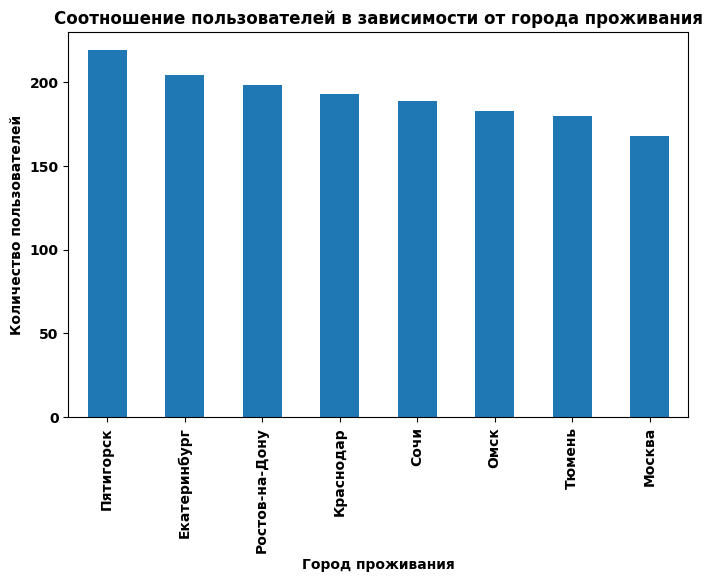

,count_of_users,share_of_users
city,,
Пятигорск,219,14.28
Екатеринбург,204,13.30
Ростов-на-Дону,198,12.91
Краснодар,193,12.58
Сочи,189,12.32
Омск,183,11.93
Тюмень,180,11.73
Москва,168,10.95


In [50]:
# формирование свода о соотношении пользователей в зависимости от городов проживания
display_info(users, 'city', 'Соотношение пользователей в зависимости от города проживания', 'Город проживания', 'Количество пользователей')

**Вывод по промежуточному этапу**:

* В наборе данных представлены пользователи из 8 городов: **Пятигорск, Екатеринбург, Ростов-на-Дону, Краснодар, Сочи, Омск, Тюмень, Москва**;
* **Наибольшее количество пользователей** проживает в Пятигорске - **219 аккаунтов**, **наименьшее** - в Москве: **168 аккаунтов**;
* Информация о пользователях "плотно упакована" - **нет серьезных перепадов по количествам аккаунтов в разных городах** (примерно все распределены равномерно);

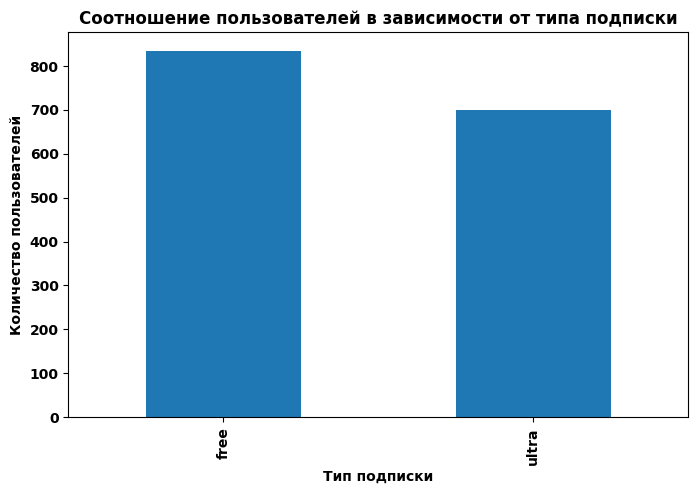

,count_of_users,share_of_users
subscription_type,,
free,835,54.43
ultra,699,45.57


In [51]:
# формирование свода о соотношении пользователей в зависимости от типов подписки
display_info(users, 'subscription_type', 'Соотношение пользователей в зависимости от типа подписки', 'Тип подписки', 'Количество пользователей')

**Вывод по промежуточному этапу**:

* В наборе данных представлены пользователи с 2 типами подписок: **free - бесплатная базовая подписка** и **ultra - платная подписка с расширенным функционалом**;
* **Большинство пользователей** используют бесплатную подписку: **835 аккаунтов**, **меньшинство** - платную: **699 аккаунтов**;
* Информация о пользователях "плотно упакована" - **нет серьезных перепадов по количествам аккаунтов по типам подписок** (примерно все распределены равномерно);

In [52]:
# инициализация пользовательской функции по построению гистограмм по передаваемым метрикам
def histogram_plotting(data: pd.DataFrame, feature : str, bins: int, x_size: int, y_size: int):
    # вычисление статистических метрик для дальнейшей визуализации
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    # построение визуализации
    plt.figure(figsize = (x_size, y_size))
    plt.hist(data[feature], color = 'blue', edgecolor = 'white', bins = bins)
    plt.axvline(upper_bound, c = 'red', ls = '-', label = 'верхняя граница допустимых значений')
    plt.axvline(q3, c = 'red', ls = '--', label = '3 квартиль значений')
    plt.axvline(q1, c = 'black', ls = '--', label = '1 квартиль значений')
    plt.axvline(lower_bound, c = 'black', ls = '-', label = 'нижняя граница допустимых значений')
    plt.title(f'Гистограмма распределения значений по метрике: {feature}', fontsize = 10)
    plt.xlabel(feature)
    plt.ylabel('Количество значений по метрике')
    plt.legend()
    plt.show()

    # вывод статистических метрик на экран
    print('Верхняя допустимая граница значений:', upper_bound)
    print('Нижняя допустимая граница значений:', lower_bound)
    print('Медианное значение:', data[feature].median())
    print('Среднее значение:', round(data[feature].mean(), 2))

    # расчет доли аномальных значений по метрике
    print('Доля значений, выходящих за верхнюю границу: {:.2%}'.format(data[data[feature] > upper_bound].shape[0] / data[feature].shape[0]))
    print('Доля значений, выходящих за нижнюю границу: {:.2%}'.format(data[data[feature] < lower_bound].shape[0] / data[feature].shape[0]))

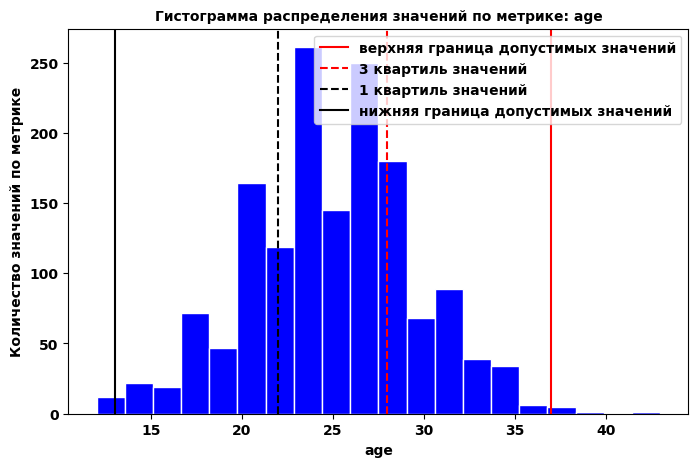

Верхняя допустимая граница значений: 37.0
Нижняя допустимая граница значений: 13.0
Медианное значение: 25.0
Среднее значение: 24.9
Доля значений, выходящих за верхнюю границу: 0.33%
Доля значений, выходящих за нижнюю границу: 0.26%


In [53]:
# построение визуализации по величине "возраст пользователей" - 'age'
histogram_plotting(users, 'age', 20, 8, 5)

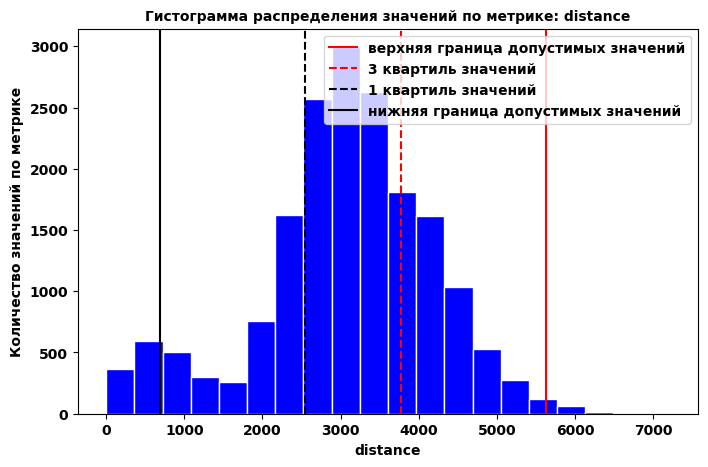

Верхняя допустимая граница значений: 5625.717298360568
Нижняя допустимая граница значений: 693.7317969370258
Медианное значение: 3133.6099936787664
Среднее значение: 3070.66
Доля значений, выходящих за верхнюю границу: 0.70%
Доля значений, выходящих за нижнюю границу: 5.04%


In [54]:
# построение визуализации по величине "преодоленное расстояние" - 'distance'
histogram_plotting(rides, 'distance', 20, 8, 5)

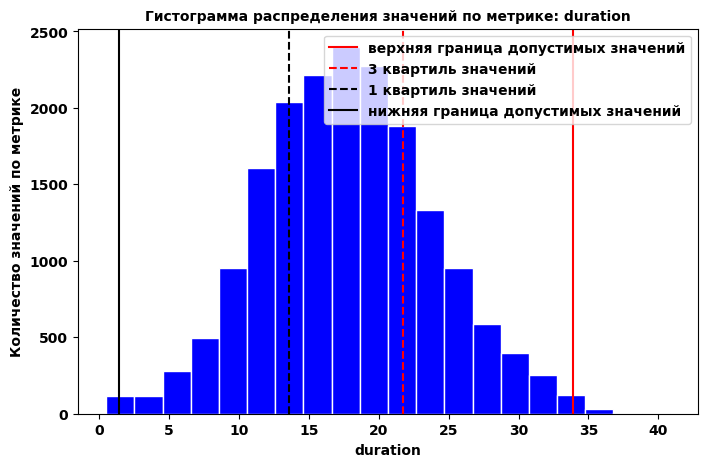

Верхняя допустимая граница значений: 33.91565577561293
Нижняя допустимая граница значений: 1.4067070934272756
Медианное значение: 17.678394530393803
Среднее значение: 17.81
Доля значений, выходящих за верхнюю границу: 0.45%
Доля значений, выходящих за нижнюю границу: 0.53%


In [55]:
# построение визуализации по величине "преодоленное расстояние" - 'distance'
histogram_plotting(rides, 'duration', 20, 8, 5)

**Вывод по промежуточному этапу**:

* Все исследуемые метрики - **distance**, **age** и **duration** - имеют **близкие к нормальному распределения**;
* **Наблюдаются небольшие выбросы по всем исследуемым метрикам** - их количество пренебрежимо мало, что позволяет **исключить подобные объекты из наборов данных**.

In [56]:
# инициализация пользовательской функции по выводу статистики о фильтрации значений
def filtration (df: pd.DataFrame, metric : str, upper_bound, lower_bound, df_name : str):
    print(f'Количество строк в наборе {df_name} ДО фильтрации:', df.shape[0])
    count_of_rows = df.shape[0]
    df = df[(df[metric] <= upper_bound) & (df[metric] >= lower_bound)]
    print(f'Количество строк в наборе {df_name} ПОСЛЕ фильтрации:', df.shape[0])
    print('Процент исключенных значений {:.2%}'.format(1 - df.shape[0] / count_of_rows))

In [57]:
# статистика по набору users
filtration(users, 'age', 37, 13, 'users')

Количество строк в наборе users ДО фильтрации: 1534
Количество строк в наборе users ПОСЛЕ фильтрации: 1525
Процент исключенных значений 0.59%


In [58]:
# статистика по набору rides после фильтрации по дистанции
filtration(rides, 'distance', 5_625, 693, 'rides')

Количество строк в наборе rides ДО фильтрации: 18068
Количество строк в наборе rides ПОСЛЕ фильтрации: 17033
Процент исключенных значений 5.73%


In [59]:
# статистика по набору rides после фильтрации по продолжительности
filtration(rides, 'duration', 33, 1, 'rides')

Количество строк в наборе rides ДО фильтрации: 18068
Количество строк в наборе rides ПОСЛЕ фильтрации: 17827
Процент исключенных значений 1.33%


In [60]:
# фильтрация набора users
users = users[(users['age'] <= 37) & (users['age'] >= 13)]

# фильтрация набора rides
rides = rides[(rides['distance'] <= 5625) & (rides['distance'] >= 693)]
rides = rides[(rides['duration'] <= 33) & (rides['duration'] >= 1)]

In [61]:
rides.shape[0]

16816

**Вывод**:

1. Построена визуализация и выведена статистика по количеству пользователей в разных городах:
    * В наборе данных представлены пользователи из 8 городов: **Пятигорск, Екатеринбург, Ростов-на-Дону, Краснодар, Сочи, Омск, Тюмень, Москва**;
    * **Наибольшее количество пользователей** проживает в Пятигорске - **219 аккаунтов**, **наименьшее** - в Москве: **168 аккаунтов**;
    * Информация о пользователях "плотно упакована" - **нет серьезных перепадов по количествам аккаунтов в разных городах** (примерно все распределены равномерно);
2. Построена визуализация и выведена статистика соотношения пользователей с подпиской и без нее:
    * В наборе данных представлены пользователи с 2 типами подписок: **free - бесплатная базовая подписка** и **ultra - платная подписка с расширенным функционалом**;
    * **Большинство пользователей** используют бесплатную подписку: **835 аккаунтов**, **меньшинство** - платную: **699 аккаунтов**;
    * Информация о пользователях "плотно упакована" - **нет серьезных перепадов по количествам аккаунтов по типам подписок** (примерно все распределены равномерно);
3. Описаны основные статистические показатели возраста пользователей:
    * **Медианное значение: 25.0**;
    * **Среднее значение: 24.9.**
4. Описаны основные статистические показатели расстояния, которое пользователь преодолел за одну поездку:
    * **Медианное значение: 3133.6**;
    * **Среднее значение: 3070.66.**
5. Описаны основные статистические показатели продолжительности поездок:
    * **Медианное значение: 17.7**;
    * **Среднее значение: 17.81.**
6. Выполнена фильтрация наборов данных по границам критических значений:
    * **Количество строк в наборе users ПОСЛЕ фильтрации  - 1 525**;
    * **Количество строк в наборе rides ПОСЛЕ фильтрации - 16 816**; 

## Объединение данных <a class = 'anchor' id = 'Объединение'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Объединение 3 наборов данных - `users, rides, subscriptions` - в один. Инициализация переменной data - сохранение результата объединения.
2. Создание 2 новых наборов исходя из информации о типах подписки: инициализация переменных `data_free`, `data_ultra`;
3. Визуализация показателей о времени и длительности поездок для данных наборов;
4. Формирование вывода по итогам этапа.

In [62]:
# объединение наборов данных в один
data = rides.merge(users, on='user_id').merge(subscriptions, on = 'subscription_type')

# проверка корректности объединения
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [63]:
# создание двух новых наборов данных
data_free = data.query('subscription_type == "free"')
data_ultra = data.query('subscription_type == "ultra"')

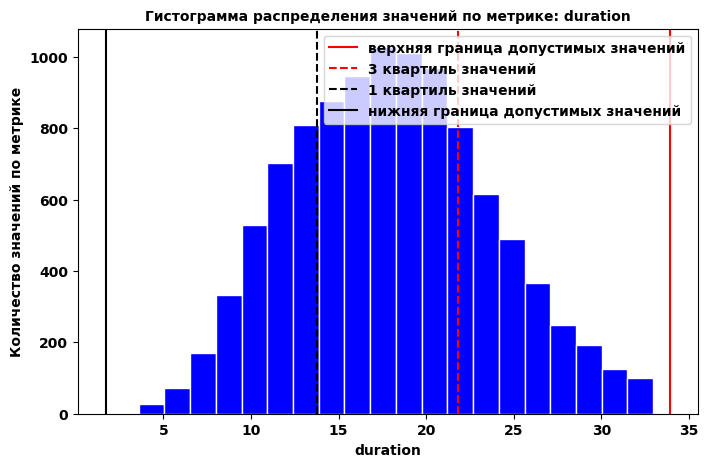

Верхняя допустимая граница значений: 33.901543747274
Нижняя допустимая граница значений: 1.733431828405278
Медианное значение: 17.83808820202718
Среднее значение: 18.01
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [64]:
# визуализация показателей по времени поездок - для пользователей с бесплатной подпиской
histogram_plotting(data_free, 'duration', 20, 8, 5)

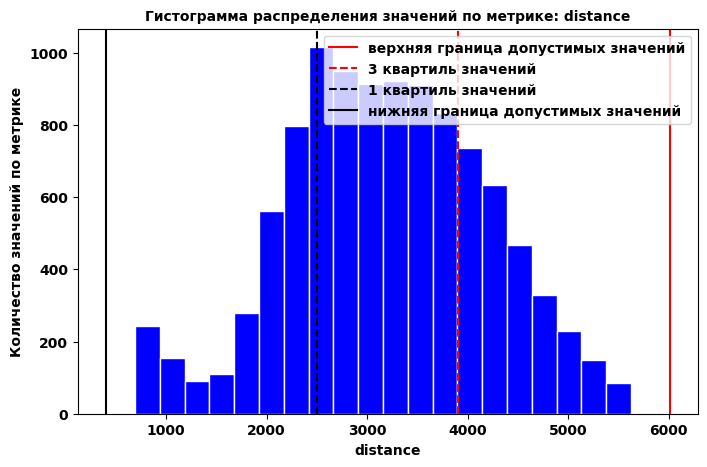

Верхняя допустимая граница значений: 6008.689920466666
Нижняя допустимая граница значений: 405.04231251397823
Медианное значение: 3182.8374987481293
Среднее значение: 3195.03
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [65]:
# визуализация показателей по расстоянию поездок - для пользователей с бесплатной подпиской
histogram_plotting(data_free, 'distance', 20, 8, 5)

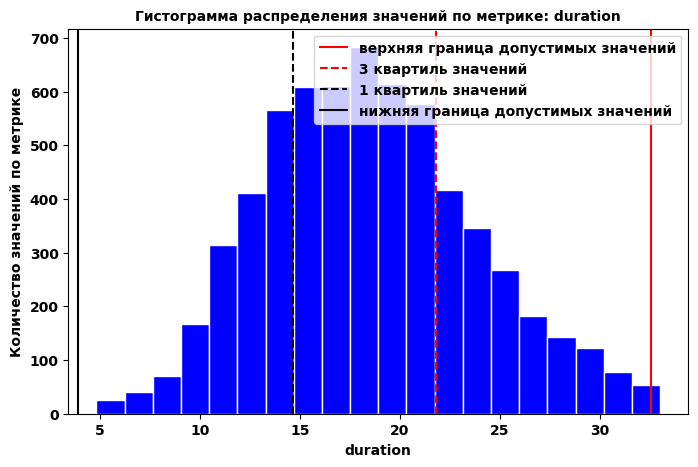

Верхняя допустимая граница значений: 32.559316748052225
Нижняя допустимая граница значений: 3.9015265841277333
Медианное значение: 18.204682814274435
Среднее значение: 18.49
Доля значений, выходящих за верхнюю границу: 0.16%
Доля значений, выходящих за нижнюю границу: 0.00%


In [66]:
# визуализация показателей по времени поездок - для пользователей с платной подпиской
histogram_plotting(data_ultra, 'duration', 20, 8, 5)

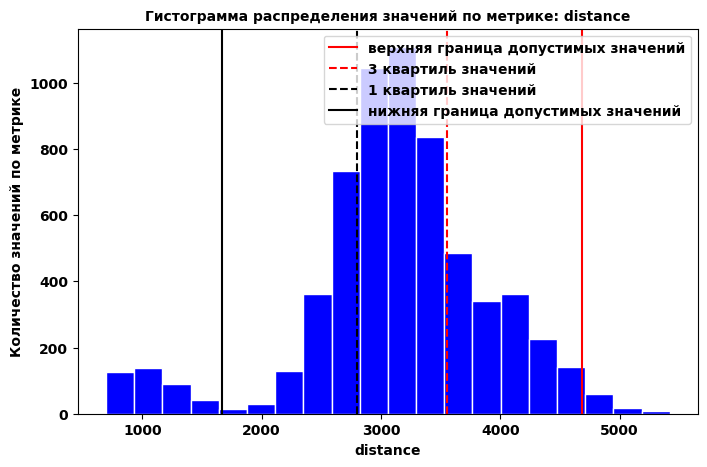

Верхняя допустимая граница значений: 4685.370126988203
Нижняя допустимая граница значений: 1668.118563462619
Медианное значение: 3150.863753673866
Среднее значение: 3139.52
Доля значений, выходящих за верхнюю границу: 1.57%
Доля значений, выходящих за нижнюю границу: 6.34%


In [67]:
# визуализация показателей по расстоянию поездок - для пользователей с платной подпиской
histogram_plotting(data_ultra, 'distance', 20, 8, 5)

**Вывод**:

1. Выполнено объединение 3 наборов данных - `users, rides, subscriptions` - в один. Инициализирована переменная `data` - в ней сохранен результата объединения;
2. Созданы 2 новых набора исходя из информации о типах подписки: инициализированы переменные `data_free`, `data_ultra`;
3. Визуализированы показатели пройденной дистанции и времени поездок для двух наборов:
    * В среднем пользователи платной и бесплатной подписок проезжают примерно одинаковое расстояние;
    * В среднем время поездок пользователей с платной подпиской немного больше, чем у пользователей с бесплатной подпиской;
    * Распределения по времени и расстоянию поездок для обоих типов пользователей близки к нормальным.

## Расчет помесячной выручки с пользователя <a class = 'anchor' id = 'Выручка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Создание набора данных **с агрегированными значениями расстояний, количества поездок и времени**, проведенного в поездках по каждому пользователю за каждый месяц - инициализация переменной `agg_users_data`;
2. Создание столбца с помесячной выручкой, которую принес каждый пользователь - **revenue**;
3. Формирование вывода по итогам этапа.

In [68]:
# формирование сводной таблицы по пользователям
agg_users_data = data.groupby(['user_id', 'month']).agg({'distance':'sum', 'duration':'sum', 'user_id':'count'})
agg_users_data.columns = ['total_distance', 'total_duration', 'rides_count']

# округление длительности поездки в большую сторону
agg_users_data['total_duration'] = np.ceil(agg_users_data['total_duration']).astype(int)

# сброс индексов в наборе данных
agg_users_data = agg_users_data.reset_index()

# добавление в сводную таблицу информации о типе подписки
agg_users_data = agg_users_data.merge(users, on = 'user_id', how = 'left')
agg_users_data = agg_users_data.merge(subscriptions, on = 'subscription_type', how = 'left')

# расчет помесячной выручки для каждого пользователя
def revenue_calculation(row):
    if row['subscription_type'] == 'ultra':
        return row['minute_price'] * row['total_duration'] + row['start_ride_price'] + row['subscription_fee']
    else:
        return row['minute_price'] * row['total_duration'] + row['start_ride_price']

agg_users_data['revenue'] = agg_users_data.apply(revenue_calculation, axis = 1)

agg_users_data['revenue'] = agg_users_data['revenue'].astype(int)

display(agg_users_data.head(10))

,user_id,month,total_distance,total_duration,rides_count,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.511294,42,2,Кира,22,Тюмень,ultra,6,0,199,451
1,1,4,754.159807,7,1,Кира,22,Тюмень,ultra,6,0,199,241
2,1,8,6723.470560,45,2,Кира,22,Тюмень,ultra,6,0,199,469
3,1,10,5809.911100,32,2,Кира,22,Тюмень,ultra,6,0,199,391
4,1,11,7003.499363,54,3,Кира,22,Тюмень,ultra,6,0,199,523
5,1,12,6751.629942,28,2,Кира,22,Тюмень,ultra,6,0,199,367
6,2,3,10187.723006,61,3,Станислав,31,Омск,ultra,6,0,199,565
7,2,4,6164.381824,40,2,Станислав,31,Омск,ultra,6,0,199,439
8,2,6,3255.338202,14,1,Станислав,31,Омск,ultra,6,0,199,283
9,2,7,6780.722964,47,2,Станислав,31,Омск,ultra,6,0,199,481


**Вывод**:

1. Создан набор данных **с агрегированными значениями расстояний, количества поездок и времени**, проведенного в поездках **по каждому пользователю за каждый месяц** - инициализирована переменная `agg_users_data`;
2. Создан столбец с помесячной выручкой, которую принес каждый пользователь - **revenue**;
3. Набор данных готов к последующему статистическому анализу.

## Статистический анализ данных <a class = 'anchor' id = 'СтатАнализ'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Проверка гипотезы: "Тратят ли пользователи с подпиской **больше** времени на поездки?"
2. Расстояние одной поездки в **3 130 метров** - оптимальное с точки зрения износа самоката. Проверка гипотезы: "Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает **3 130 метров**?"
3. Влияет ли подписка на выручку - `будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки`;
4. Повлияло ли обновление серверов в комании на количество обращений - `снизилось ли количество запросов в службу техподдержки?`
5. Формирование вывода по итогам этапа.

### Проверка гипотезы о длительности поездки для пользователей с подпиской <a class = 'anchor' id = 'СтатАнализ_подпискаДлительность'></a>

Для последующих этапов необходимо каждый раз формировать нулевую и альтернативную гипотезы для их проверки с помощью статистических тестов.

Для данного этапа сформируем следующие гипотезы:

* `H0`: **пользователи с премиум подпиской тратят меньшее или равное количество времени на поездки, чем обычные пользователи**;
* `H1`: **пользователи с премиум подпиской тратят больше времени на поездки, чем обычные пользователи**;

In [72]:
# проверка гипотезы о длительности поездок для премиум пользователей

# задаем уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    data_free['duration'],
    data_ultra['duration'],
    alternative = 'greater'
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.9999999839531847
Не получилось отвергнуть нулевую гипотезу


**Вывод по промежуточному этапу**:

Проверка t-тестом позволила принять нулевую гипотезу - сильной разницы между пользователями, использующих подписку и обычных пользователей не выявлено. **Пользователи с подпиской не тратят больше времени на поездки.**

### Проверка гипотезы о пройденном расстоянии до износа самоката <a class = 'anchor' id = 'СтатАнализ_износ'></a>

Для данного этапа сформируем следующие гипотезы:

* `H0`: **пользователи проезжают равное или большее расстояние в 3 130 метров**;
* `H1`: **пользователи проезжают меньшее расстояние в 3 130 метров**.

In [76]:
# проверка гипотезы о величине среднего расстояния
# для проверки гипотезы используем набор 'data_ultra'

# задаем уровень статистической значимости
alpha = 0.05

results = st.ttest_1samp(
    data_ultra['distance'],
    popmean = 3_130,
    alternative = 'less'
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.833438983882234
Не получилось отвергнуть нулевую гипотезу


**Вывод по промежуточному этапу**:

Проверка t-тестом позволила принять нулевую гипотезу - **пользователи с премиум подпиской проезжают равное или большее расстояние в 3 130 метров**.